# Setup

In [1]:
%reload_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [3]:
SYS_PROJECT_DIR  = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr'
SYS_SRC_DIR  = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr'
# SYS_CONFIG_DIR  = '/content/gdrive/MyDrive/Colab Notebooks/deoptima/deoptima/deoptima/config'
# SYS_RUNTIME_DIR = '/content/gdrive/MyDrive/Colab Notebooks/deoptima/deoptima/runtime'

In [4]:
import os
import pandas as pd
import shutil

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.copy_on_write = True

# Installs

In [5]:
import os

requirements = """
python-dotenv==1.0.1
Levenshtein==0.27.1
"""

requirements_path = os.path.join(SYS_SRC_DIR, 'requirements.txt')
with open(requirements_path, 'w') as f:
    f.write(requirements)

22

In [6]:
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"

In [7]:
import os
requirements_path = os.path.join(SYS_SRC_DIR, 'requirements.txt')
!pip install -q -r '{requirements_path}'

In [8]:
import sys
import os

if SYS_PROJECT_DIR not in sys.path:
    sys.path.append(SYS_PROJECT_DIR)

In [9]:
os.chdir(SYS_SRC_DIR)
from dotenv import load_dotenv
_ = load_dotenv('.env')
from dotenv import dotenv_values
env_from_file = dotenv_values('.env')
# env_from_file

# Evaluation Summary

## VIDEO_IDS

In [15]:
VIDEO_IDS = {
    "legal_document_01": "m-z-0194c270-bbfb-7dd2-aaec-62d909b97b32",
    "react_05": "m-z-0194c272-dd5c-7a62-8d86-a47e3c4e4670",
    "react_03": "m-z-0194c27c-894f-7e11-beac-6da09861f796",
    "css_02": "m-z-0194c27c-aebe-75d0-812f-06fbeb60b7d6",
    "react_01": "m-z-0194c27c-d107-7030-b990-0b5cc62f514a",
    "stock_market_ticker_01": "m-z-0194c27c-f30c-7803-b2ca-8f1026c940a2",
    "CNBC_01": "m-z-0194c27d-10a6-7531-9aaf-d7940a9469b1",
    "legal_document_03": "m-z-0194c27d-2e68-7e63-b44e-5abbe36938df",
    "new_paper_reading_04": "m-z-0194c27d-50bc-7c22-9d73-3756717196d5",
    "white_board_music_theory_01": "m-z-0194c27d-71a3-72c2-9710-773f6f6b80b5",
    "handwriting_analysis_02": "m-z-0194c27d-98b2-75c0-afff-77c8b24515bc",
    "react_animation_02": "m-z-0194c27d-b22a-7982-a796-e332a82d5596",
    "film_analysis_02": "m-z-0194c27d-d8d7-73b3-b136-1f4af218cb12",
    "billboard_pederstian": "m-z-0194c27d-f7f8-7d03-b053-7f0e75498476",
    "CNBC_04": "m-z-0194c27e-19c0-7270-9b2e-d467ff30fd1a",
    "cursive_writing_whiteboard": "m-z-0194c27e-408d-73b1-b550-5bf76fb0339d",
    "legal_document_05": "m-z-0194c27e-5dcf-73b3-a129-e9217d8e611f",
    "react_animation_01": "m-z-0194c27e-99ce-7fc0-867f-9bc8358d3388",
    "stock_market_ticker_02": "m-z-0194c27e-fe96-7403-a0d8-17a033e5f595",
    "walk_sign": "m-z-0194c27f-2095-76a3-bc26-96f1167e2526",
    "white_board_music_theory_02": "m-z-0194c27f-60d8-74e2-b777-bfed7d9b49d4",
    "handwriting_analysis_01": "m-z-0194c27f-836c-72f2-8c43-2eeedd6dbc2b",
    "css_01": "m-z-0194c27f-a202-7f00-80a9-3bb8a3bf257d",
    "cursive_handwriting_01": "m-z-0194c27f-e828-7f43-be2e-7fa19bc39dd4",
    "calculus_limits_01": "m-z-0194c280-0778-7b52-8268-c6f1d00dbd52",
}

## input data - gpt-4o

In [ ]:
model_id = 'gpt-4o'
evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/gpt_results/gpt-4o'

In [ ]:
run_ids = {
    'ocr_2025-03-09_14-52-43': VIDEO_IDS['legal_document_01'],
    'ocr_2025-03-10_00-37-25': VIDEO_IDS['react_05'],
    'ocr_2025-03-10_01-23-59': VIDEO_IDS['react_03'],
    'ocr_2025-03-10_02-06-01': VIDEO_IDS['css_02'],
    'ocr_2025-03-19_14-43-37': VIDEO_IDS['react_01'],
    'ocr_2025-03-19_14-50-19': VIDEO_IDS['stock_market_ticker_01'],
    'ocr_2025-03-19_21-23-09': VIDEO_IDS['CNBC_01'],
    'ocr_2025-03-19_21-30-54': VIDEO_IDS['legal_document_03'],
    'ocr_2025-03-19_21-34-28': VIDEO_IDS['new_paper_reading_04'],
    'ocr_2025-03-19_22-15-44': VIDEO_IDS['white_board_music_theory_01'],
    'ocr_2025-03-19_22-19-32': VIDEO_IDS['handwriting_analysis_02'],
    'ocr_2025-03-19_22-38-00': VIDEO_IDS['react_animation_02'],
    'ocr_2025-03-19_23-04-00': VIDEO_IDS['film_analysis_02'],
    'ocr_2025-03-19_23-14-38': VIDEO_IDS['billboard_pederstian'],
    'ocr_2025-03-19_23-20-30': VIDEO_IDS['CNBC_04'],
    'ocr_2025-03-19_23-43-13': VIDEO_IDS['cursive_writing_whiteboard'],
    'ocr_2025-03-19_23-56-10': VIDEO_IDS['legal_document_05'],
    'ocr_2025-03-20_00-16-06': VIDEO_IDS['react_animation_01'],
    'ocr_2025-03-20_00-21-50': VIDEO_IDS['stock_market_ticker_02'],
    'ocr_2025-03-20_00-37-17': VIDEO_IDS['walk_sign'],
    'ocr_2025-03-20_00-39-08': VIDEO_IDS['white_board_music_theory_02'],
    'ocr_2025-03-20_00-42-04': VIDEO_IDS['handwriting_analysis_01'],
    'ocr_2025-03-20_00-48-19': VIDEO_IDS['css_01'],
    'ocr_2025-03-20_00-51-31': VIDEO_IDS['cursive_handwriting_01'],
    'ocr_2025-03-20_01-08-50': VIDEO_IDS['calculus_limits_01'],
}


## input data - mistral-ocr-latest

In [ ]:
# model_id = 'mistral-ocr-latest'

In [ ]:
# evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/mistral_results/mistral-ocr-latest'
# run_ids = {
#     'ocr_2025-03-09_21-42-02': VIDEO_IDS['legal_document_01'],
#     'ocr_2025-03-10_00-00-47': VIDEO_IDS['react_05'],
#     'ocr_2025-03-10_00-22-59': VIDEO_IDS['react_03'],
#     'ocr_2025-03-10_00-34-05': VIDEO_IDS['css_02'],
#     'ocr_2025-03-10_00-41-53': VIDEO_IDS['react_01'],
# }

## input data - gemini-2.0-flash

In [16]:
model_id = 'gemini-2.0-flash'
evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/gemini_results/gemini-2.0-flash'

In [17]:
run_ids = {
    'ocr_2025-03-11_00-59-10': VIDEO_IDS['legal_document_01'],
    'ocr_2025-03-17_00-49-02' : VIDEO_IDS['react_05'],
    'ocr_2025-03-17_00-53-59' : VIDEO_IDS['react_03'],
    'ocr_2025-03-17_00-55-12' : VIDEO_IDS['css_02'],
    'ocr_2025-03-17_01-00-20' : VIDEO_IDS['react_01'],
    'ocr_2025-03-17_01-02-32' : VIDEO_IDS['stock_market_ticker_01'],
    'ocr_2025-03-20_17-46-24' : VIDEO_IDS['CNBC_01'],
    'ocr_2025-03-20_22-54-03' : VIDEO_IDS['legal_document_03'],
    'ocr_2025-03-20_22-57-30' : VIDEO_IDS['new_paper_reading_04'],
    'ocr_2025-03-20_23-38-05' : VIDEO_IDS['white_board_music_theory_01'],
    'ocr_2025-03-20_23-43-14' : VIDEO_IDS['handwriting_analysis_02'],
    'ocr_2025-03-21_00-27-16' : VIDEO_IDS['react_animation_02'],
    'ocr_2025-03-21_00-55-30' : VIDEO_IDS['film_analysis_02'],
    'ocr_2025-03-21_01-55-23' : VIDEO_IDS['billboard_pederstian'],
    'ocr_2025-03-21_02-01-30' : VIDEO_IDS['CNBC_04'],
    'ocr_2025-03-21_02-04-11' : VIDEO_IDS['cursive_writing_whiteboard'],
    'ocr_2025-03-21_02-27-34' : VIDEO_IDS['legal_document_05'],
    'ocr_2025-03-21_12-39-07' : VIDEO_IDS['react_animation_01'],
    'ocr_2025-03-22_00-52-20' : VIDEO_IDS['stock_market_ticker_02'],
    'ocr_2025-03-22_01-05-08' : VIDEO_IDS['walk_sign'],
    'ocr_2025-03-22_01-27-25' : VIDEO_IDS['white_board_music_theory_02'],
    'ocr_2025-03-22_22-40-59' : VIDEO_IDS['handwriting_analysis_01'],
    'ocr_2025-03-22_22-51-53' : VIDEO_IDS['css_01'],
    'ocr_2025-03-22_23-02-52' : VIDEO_IDS['cursive_handwriting_01'],
    'ocr_2025-03-22_23-08-48' : VIDEO_IDS['calculus_limits_01']
}

# Prepare evaluation data

In [18]:
# model_id = 'gpt-4o'
# evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/gpt_results/gpt-4o'
model_id = 'gemini-2.0-flash'
evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/gemini_results/gemini-2.0-flash'

In [19]:
import os
import numpy as np
import pandas as pd

evaluation_df = pd.DataFrame() ; evaluation_summary_vid = []

for k, v in run_ids.items():
  evaluation_path = os.path.join(evaluation_model_dir, k, 'evaluations', v + '.json')
  i_df = pd.read_json(evaluation_path)
  i_summary = {
              "model": model_id,
              "vid": v,
              "total_frames": i_df.shape[0],
              "avg_cer": np.round(np.average(i_df['cer']),4),
              "avg_wer": np.round(np.average(i_df['wer']),4),
              "avg_acc": np.round(np.average(i_df['accuracy']),2),
              "avg_order_agnostic_acc": np.round(np.average(i_df['order_agnostic_accuray']),2),
              "avg_processing_time": np.round(np.average(i_df['processing_time']),3),
              }
  evaluation_summary_vid.append(i_summary)
  evaluation_df = pd.concat([evaluation_df, i_df], axis = 0)

In [20]:
import numpy as np

evaluation_summary_model = {
    "model": model_id,
    "total_vids": len(run_ids.values()),
    "total_frames": evaluation_df.shape[0],
    "avg_cer": np.round(np.average(evaluation_df['cer']),4),
    "avg_wer": np.round(np.average(evaluation_df['wer']),4),
    "avg_acc": np.round(np.average(evaluation_df['accuracy']),2),
    "avg_order_agnostic_acc": np.round(np.average(evaluation_df['order_agnostic_accuray']),2),
    "avg_processing_time": np.round(np.average(evaluation_df['processing_time']),3),
    }

evaluation_summary_model

{'model': 'gemini-2.0-flash',
 'total_vids': 6,
 'total_frames': 243,
 'avg_cer': np.float64(0.277),
 'avg_wer': np.float64(0.3601),
 'avg_acc': np.float64(72.3),
 'avg_order_agnostic_acc': np.float64(92.08),
 'avg_processing_time': np.float64(1.619)}

In [21]:
import json

evaluation_summary_path = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/evaluation'

with open(os.path.join(evaluation_summary_path,f"evaluation_df_{model_id}.csv"), "w") as file:
    evaluation_df.to_csv(file, index=False)

with open(os.path.join(evaluation_summary_path,f"summary_data_{model_id}_vid.json"), "w") as json_file:
    json.dump(evaluation_summary_vid, json_file, indent=4)

with open(os.path.join(evaluation_summary_path,f"summary_data_{model_id}.json"), "w") as json_file:
    json.dump(evaluation_summary_model, json_file, indent=4)

# Evaluation Viz

In [17]:
model_ids = ['gpt-4o', 'gemini-2.0-flash']
evaluation_summary_path = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/evaluation'

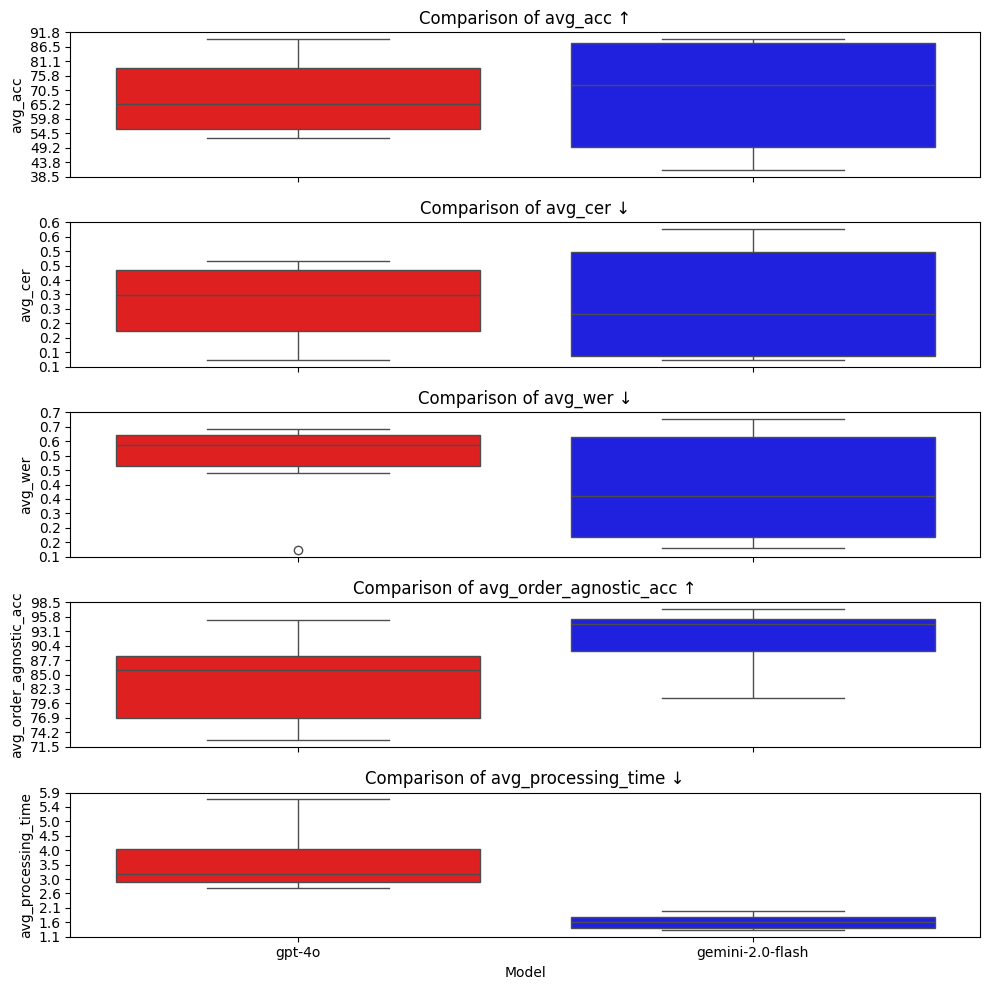

In [67]:
# from ocr.utils import plot_evaluation_heatmap_1
plot_evaluation_boxplot(evaluation_summary_path, model_ids)

In [ ]:
# from ocr.utils import plot_evaluation_heatmap_1
# plot_evaluation_heatmap_1(evaluation_summary_path, model_ids)

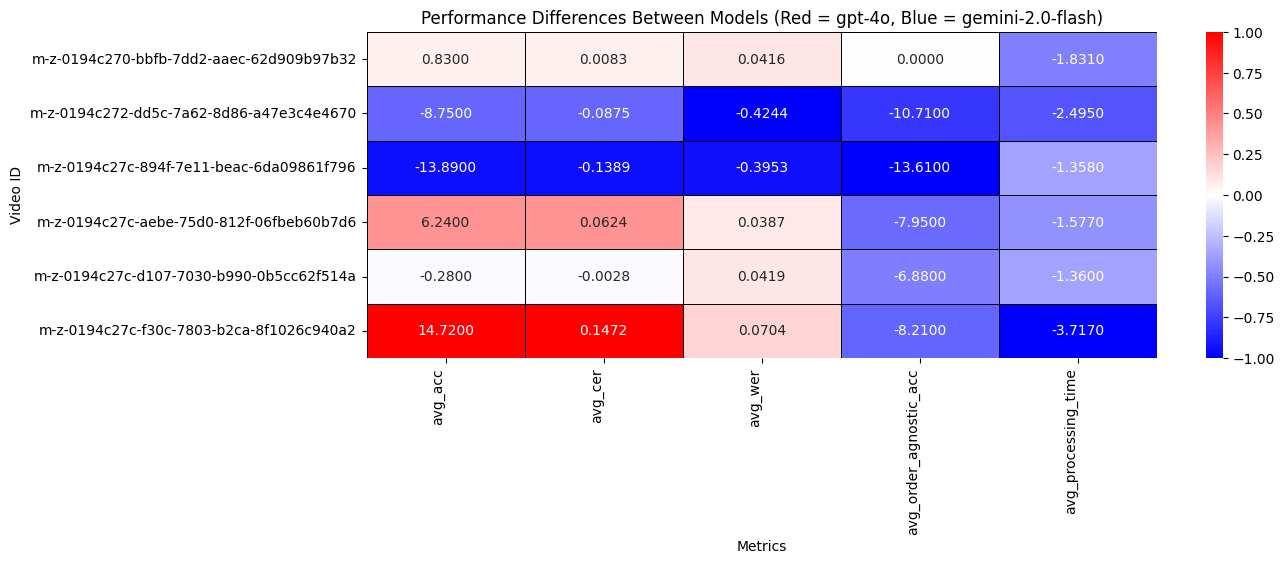

In [ ]:
from ocr.utils import plot_evaluation_heatmap_2
plot_evaluation_heatmap_2(evaluation_summary_path, model_ids)

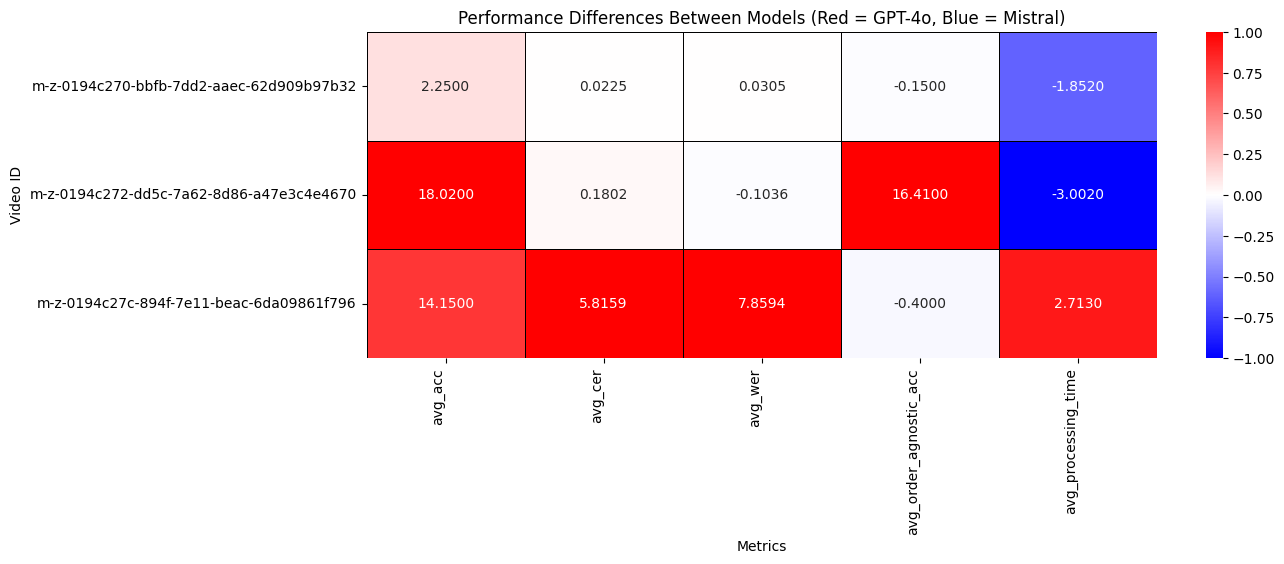

In [ ]:
import json
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define the path to the evaluation summaries and the models to compare
evaluation_summary_path = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/evaluation'
model_ids = ['gpt-4o', 'mistral-ocr-latest']

# Define metric direction: 1 means higher is better, -1 means lower is better
metric_directions = {
    'avg_acc': 1,  # Higher accuracy is better
    'avg_cer': -1,  # Lower Character Error Rate (CER) is better
    'avg_wer': -1,  # Lower Word Error Rate (WER) is better
    'avg_order_agnostic_acc': 1,  # Higher order-agnostic accuracy is better
    'avg_processing_time': -1  # Lower processing time is better
}

# Read all JSON files into a dictionary of DataFrames
dfs = {}
for model_id in model_ids:
    with open(os.path.join(evaluation_summary_path, f"summary_data_{model_id}_vid.json"), 'r') as f:
        data = json.load(f)
        df = pd.DataFrame(data)
        df = df[['model', 'vid'] + list(metric_directions.keys())]
        dfs[model_id] = df

# Merge DataFrames on 'vid'
merged_df = pd.merge(dfs[model_ids[0]], dfs[model_ids[1]], on='vid', suffixes=('_gpt4o', '_mistral'))

# Calculate differences based on metric direction
for metric, direction in metric_directions.items():
    if direction == 1:  # Higher is better
        merged_df[f'{metric}_diff'] = merged_df[f'{metric}_gpt4o'] - merged_df[f'{metric}_mistral']
    else:  # Lower is better
        merged_df[f'{metric}_diff'] = merged_df[f'{metric}_mistral'] - merged_df[f'{metric}_gpt4o']

# Apply Max Absolute Scaling
scaled_df = merged_df[[f'{metric}_diff' for metric in metric_directions]].apply(lambda x: x / np.max(np.abs(x)))

# Create a DataFrame for annotations with original values
annotations_df = merged_df[[f'{metric}_diff' for metric in metric_directions]].map(lambda x: f'{x:.4f}')

# Custom colormap (red = GPT-4o better, blue = Mistral better)
cmap_red_blue = mcolors.LinearSegmentedColormap.from_list("red_blue", ["blue", "white", "red"])

# Set up the matplotlib figure with increased size
plt.figure(figsize=(14, len(merged_df) * 2))

# Plot the heatmap
sns.heatmap(
    scaled_df,
    cmap=cmap_red_blue,
    center=0,
    cbar=True,
    annot=annotations_df,
    fmt='',
    linewidths=0.5,
    linecolor='black',
    xticklabels=[metric for metric in metric_directions],
    yticklabels=merged_df['vid']
)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90, ha='right')

# Set labels
plt.xlabel('Metrics')
plt.ylabel('Video ID')
plt.title('Performance Differences Between Models (Red = GPT-4o, Blue = Mistral)')

# Adjust layout with specific padding
plt.tight_layout(pad=2.0, h_pad=2.0, w_pad=2.0)
plt.show();

# Case Evaluation

In [56]:
model_id = 'gemini-2.0-flash'

# evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/gpt_results/gpt-4o'
# evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/mistral_results/mistral-ocr-latest'
evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/gemini_results/gemini-2.0-flash'

In [57]:
import pandas as pd

with open(os.path.join(evaluation_summary_path,f"evaluation_df_{model_id}.csv"), "r") as file:
    evaluation_df = pd.read_csv(file)

In [58]:
evaluation_df['image'] = evaluation_df['image'].apply(lambda x: eval(x)[0])
evaluation_df.columns = ['video_id','scene_start','scene_end','image','actual','predicted','cer','wer','accuracy','order_agnostic_accuracy','processing_time']

evaluation_df = evaluation_df.astype({'scene_end': int})

precision_dict = {'scene_end':0, 'cer': 4, 'wer': 4, 'accuracy': 2, 	'order_agnostic_accuracy': 2, 'processing_time': 3}
evaluation_df[list(precision_dict)] = evaluation_df[list(precision_dict)].round(precision_dict)

In [59]:
# # filter video
# video_id = 'm-z-0194c27c-d107-7030-b990-0b5cc62f514a'
# evaluation_df = evaluation_df.query("video_id == @video_id")

# # worst case
# metric = "accuracy"
# lower_bound = 40 ; upper_bound = 60
# evaluation_df = evaluation_df.query(f'{metric}.between(@lower_bound, @upper_bound)')
# evaluation_df_sorted = evaluation_df.sort_values(by='accuracy', ascending=True)

# # middle case
# metric = "accuracy"
# lower_bound = 85 ; upper_bound = 90
# evaluation_df = evaluation_df.query(f'{metric}.between(@lower_bound, @upper_bound)')
# evaluation_df_sorted = evaluation_df.sort_values(by='accuracy', ascending=True)

# best case
metric = "accuracy"
lower_bound = 99 ; upper_bound = 100
evaluation_df = evaluation_df.query(f'{metric}.between(@lower_bound, @upper_bound)')
evaluation_df_sorted = evaluation_df.sort_values(by='accuracy', ascending=True)

# Select the top 5 rows
evaluation_df_top = evaluation_df_sorted.head(5)

In [60]:
evaluation_df_top

,video_id,scene_start,scene_end,image,actual,predicted,cer,wer,accuracy,order_agnostic_accuracy,processing_time
81,m-z-0194c272-dd5c-7a62-8d86-a47e3c4e4670,32,33,https://storage.videodb.io/media/u-0e58db00-6548-4d3c-b8c1-4ddddc072787/m-z-0194c272-dd5c-7a62-8d86-a47e3c4e4670/frames/frm-scn-tt1sff1-32.0-33.0-32.5/img-bf729858-2465-4046-8023-7998bf3d1d9b.png,"function Article() { return ( <div> <link rel=""stylesheet"" href=""styles/article.css"" precedence=""default"" /> <article>...</article> <Comments /> </div> ) } function Comments() { return ( <Suspense fallback={<Loading />}> <link rel=""stylesheet"" href=""/styles/comments.css"" precedence=""default"" /> <link rel=""stylesheet"" href=""/styles/button.css"" precedence=""high"" /> <ul>...</ul> </Suspense> ) } <html> <head> <link rel=""stylesheet"" href=""/styles/button.css"" /> <link rel=""stylesheet"" href=""/styles/article.css"" /> <link rel=""stylesheet"" href=""/styles/comments.css"" /> </head> <body> <div> <article>...</article> </div> </body> </html>","function Article() { return ( <div> <link rel=""stylesheet"" href=""/styles/article.css"" precedence=""default"" /> <article>...</article> <Comments /> </div> ) } function Comments() { return ( <Suspense fallback={<Loading />}> <link rel=""stylesheet"" href=""/styles/comments.css"" precedence=""default"" /> <link rel=""stylesheet"" href=""/styles/button.css"" precedence=""high"" /> <>...</ </Suspense> ) } <html> <head> <link rel=""stylesheet"" href=""/styles/button.css"" /> <link rel=""stylesheet"" href=""/styles/article.css"" /> <link rel=""stylesheet"" href=""/styles/comments.css"" /> </head> <body> <div> <article>...</article> </div> </body> </html>",0.0095,0.0333,99.05,99.21,2.565
95,m-z-0194c272-dd5c-7a62-8d86-a47e3c4e4670,46,47,https://storage.videodb.io/media/u-0e58db00-6548-4d3c-b8c1-4ddddc072787/m-z-0194c272-dd5c-7a62-8d86-a47e3c4e4670/frames/frm-scn-tt1sff1-46.0-47.0-46.5/img-c1a65b2a-28f0-4d3f-ad45-51fd48315dab.png,"function Article() { return ( <div> <link rel=""stylesheet"" href=""styles/article.css"" precedence=""default"" /> <article>...</article> <Comments /> </div> ) } function Comments() { return ( <Suspense fallback={<Loading />}> <link rel=""stylesheet"" href=""/styles/comments.css"" precedence=""default"" /> <link rel=""stylesheet"" href=""/styles/button.css"" precedence=""high"" /> <ul>...</ul> </Suspense> ) } <html> <head> <link rel=""stylesheet"" href=""/styles/button.css"" /> <link rel=""stylesheet"" href=""/styles/article.css"" /> <link rel=""stylesheet"" href=""/styles/comments.css"" /> </head> <body> <div> <article>...</article> </div> </body> </html>","function Article() { return ( <div> <link rel=""stylesheet"" href=""/styles/article.css"" precedence=""default"" /> <article>...</article> <Comments /> </div> ) } function Comments() { return ( <Suspense fallback={<Loading />}> <link rel=""stylesheet"" href=""/styles/comments.css"" precedence=""default"" /> <link rel=""stylesheet"" href=""/styles/button.css"" precedence=""high"" /> <1>...</ </Suspense> ) } <html> <head> <link rel=""stylesheet"" href=""/styles/button.css"" /> <link rel=""stylesheet"" href=""/styles/article.css"" /> <link rel=""stylesheet"" href=""/styles/comments.css"" /> </head> <body> <div> <article>...</article> </div> </body> </html>",0.0095,0.0333,99.05,99.21,1.930
97,m-z-0194c272-dd5c-7a62-8d86-a47e3c4e4670,48,49,https://storage.videodb.io/media/u-0e58db00-6548-4d3c-b8c1-4ddddc072787/m-z-0194c272-dd5c-7a62-8d86-a47e3c4e4670/frames/frm-scn-tt1sff1-48.0-49.0-48.5/img-aca9a2da-694f-41d7-b825-ca2793bb5def.png,"function Article() { return ( <div> <link rel=""stylesheet"" href=""styles/article.css"" precedence=""default"" /> <article>...</article> <Comments /> </div> ) } function Comments() { return ( <Suspense fallback={<Loading />}> <link rel=""stylesheet"" href=""/styles/comments.css"" precedence=""default"" /> <link rel=""stylesheet"" href=""/styles/button.css"" precedence=""high"" /> <ul>...</ul> </Suspense> ) } <html> <hea

## Diff - word level

In [75]:
import pandas as pd
import html
from difflib import SequenceMatcher
from IPython.core.display import display, HTML

def highlight_differences_better(actual, predicted):
    """Highlight word-level differences using SequenceMatcher with side-by-side HTML output."""
    words1 = actual.split()
    words2 = predicted.split()

    matcher = SequenceMatcher(None, words1, words2)

    original_line = []
    modified_line = []

    for tag, i1, i2, j1, j2 in matcher.get_opcodes():
        if tag == 'replace':
            original_line.append(f"<span class='diff-remove'>{html.escape(' '.join(words1[i1:i2]))}</span>")
            modified_line.append(f"<span class='diff-add'>{html.escape(' '.join(words2[j1:j2]))}</span>")
        elif tag == 'delete':
            original_line.append(f"<span class='diff-remove'>{html.escape(' '.join(words1[i1:i2]))}</span>")
        elif tag == 'insert':
            modified_line.append(f"<span class='diff-add'>{html.escape(' '.join(words2[j1:j2]))}</span>")
        elif tag == 'equal':
            original_line.append(html.escape(' '.join(words1[i1:i2])))
            modified_line.append(html.escape(' '.join(words2[j1:j2])))

    highlighted_actual = ' '.join(original_line)
    highlighted_predicted = ' '.join(modified_line)

    return highlighted_actual, highlighted_predicted

def generate_html_table(df):
    html_output = """
    <style>
        .diff-remove {
            background-color: #d9534f;
            color: white;
            text-decoration: line-through;
            border-radius: 4px;
            padding: 2px 4px;
        }
        .diff-add {
            background-color: #5cb85c;
            color: white;
            border-radius: 4px;
            padding: 2px 4px;
        }
        table {
            border-collapse: collapse;
            width: 100%;
            font-family: Arial, sans-serif;
        }
        th, td {
            border: 1px solid #ccc;
            padding: 8px;
            vertical-align: top;
        }
        th {
            background-color: #f2f2f2;
        }
    </style>
    <table>
    """

    for _, row in df.iterrows():
        html_output += "<tr><th colspan='3'>General Information</th></tr>"
        html_output += "<tr><th>Video ID</th><th>Scene Start</th><th>Scene End</th></tr>"
        html_output += (
            f"<tr><td>{html.escape(str(row['video_id']))}</td>"
            f"<td>{html.escape(str(row['scene_start']))}</td>"
            f"<td>{html.escape(str(row['scene_end']))}</td></tr>"
        )

        html_output += "<tr><th colspan='3'>Prediction Information</th></tr>"
        html_output += "<tr><th>Image</th><th>Actual (w/ Diff)</th><th>Predicted (w/ Diff)</th></tr>"

        highlighted_actual, highlighted_predicted = highlight_differences_better(row['actual'], row['predicted'])

        html_output += (
            f"<tr><td><img src='{html.escape(row['image'])}' style='max-width:500px; max-height:400px;'></td>"
            f"<td>{highlighted_actual}</td>"
            f"<td>{highlighted_predicted}</td></tr>"
        )

        html_output += "<tr><th colspan='3'>Metrics</th></tr>"
        html_output += "<tr><th>Accuracy</th><th>cer</th><th>wer</th></tr>"
        html_output += (
            f"<tr><td>{html.escape(str(row['accuracy']))}</td>"
            f"<td>{html.escape(str(row['cer']))}</td>"
            f"<td>{html.escape(str(row['wer']))}</td></tr>"
        )

        html_output += "<tr><td colspan='3' style='background-color:lightgray; height:5px;'></td></tr>"

    html_output += "</table>"
    return html_output


In [ ]:
display(HTML(generate_html_table(evaluation_df_top.head(3))))

## Diff - character level

In [48]:
import pandas as pd
import html
from Levenshtein import editops, opcodes
from IPython.core.display import display, HTML

def calculate_edit_operations(actual, predicted):
    """Calculate the number of substitutions, deletions, insertions, and the length of the ground truth."""
    operations = editops(actual, predicted)
    substitutions = sum(1 for op in operations if op[0] == 'replace')
    deletions = sum(1 for op in operations if op[0] == 'delete')
    insertions = sum(1 for op in operations if op[0] == 'insert')
    return substitutions, deletions, insertions, len(actual)

def highlight_differences_char_level(actual, predicted):
    """Highlight character-level differences between actual and predicted text using Levenshtein opcodes."""
    operations = opcodes(actual, predicted)

    highlighted_actual = []
    highlighted_predicted = []

    for tag, i1, i2, j1, j2 in operations:
        if tag == 'replace':  # Character substituted
            highlighted_actual.append(f"<span class='diff-substitute'>{html.escape(actual[i1:i2])}</span>")
            highlighted_predicted.append(f"<span class='diff-substitute'>{html.escape(predicted[j1:j2])}</span>")
        elif tag == 'delete':  # Character deleted
            highlighted_actual.append(f"<span class='diff-delete'>{html.escape(actual[i1:i2])}</span>")
        elif tag == 'insert':  # Character inserted
            highlighted_predicted.append(f"<span class='diff-insert'>{html.escape(predicted[j1:j2])}</span>")
        elif tag == 'equal':  # Matching characters
            highlighted_actual.append(html.escape(actual[i1:i2]))
            highlighted_predicted.append(html.escape(predicted[j1:j2]))

    return "".join(highlighted_actual), "".join(highlighted_predicted)

def generate_html_table(df):
    html_output = """
    <style>
        .diff-substitute {
            background-color: #ffcc00; /* Yellow */
            color: black;
            border-radius: 4px;
            padding: 2px 4px;
        }
        .diff-delete {
            background-color: #d9534f; /* Dark red */
            color: white;
            text-decoration: line-through;
            border-radius: 4px;
            padding: 2px 4px;
        }
        .diff-insert {
            background-color: #5cb85c; /* Dark green */
            color: white;
            border-radius: 4px;
            padding: 2px 4px;
        }
        table {
            border-collapse: collapse;
            width: 100%;
            font-family: Arial, sans-serif;
        }
        th, td {
            border: 1px solid #ccc;
            padding: 8px;
            vertical-align: top;
        }
        th {
            background-color: #f2f2f2;
        }
    </style>
    <table>
    """

    for _, row in df.iterrows():
        html_output += "<tr><th colspan='3'>General Information</th></tr>"
        html_output += "<tr><th>Video ID</th><th>Scene Start</th><th>Scene End</th></tr>"
        html_output += (
            f"<tr><td>{html.escape(str(row['video_id']))}</td>"
            f"<td>{html.escape(str(row['scene_start']))}</td>"
            f"<td>{html.escape(str(row['scene_end']))}</td></tr>"
        )

        html_output += "<tr><th colspan='3'>Prediction Information</th></tr>"
        html_output += "<tr><th>Image</th><th>Actual (w/ Diff)</th><th>Predicted (w/ Diff)</th></tr>"

        highlighted_actual, highlighted_predicted = highlight_differences_char_level(row['actual'], row['predicted'])

        html_output += (
            f"<tr><td><img src='{html.escape(row['image'])}' style='max-width:500px; max-height:400px;'></td>"
            f"<td>{highlighted_actual}</td>"
            f"<td>{highlighted_predicted}</td></tr>"
        )

        html_output += "<tr><th colspan='3'>Metrics</th></tr>"
        html_output += "<tr><th>Accuracy</th><th>CER (S, D, I, N)</th><th>WER</th></tr>"
        html_output += (
            f"<tr><td>{html.escape(str(row['accuracy']))}</td>"
            f"<td>{html.escape(str(row['cer']))} "
            f"(S={row['substitutions']}, D={row['deletions']}, I={row['insertions']}, N={row['N']})</td>"
            f"<td>{html.escape(str(row['wer']))}</td></tr>"
        )

        html_output += "<tr><td colspan='3' style='background-color:lightgray; height:5px;'></td></tr>"

    html_output += "</table>"
    return html_output

# Assuming your DataFrame is named evaluation_df_top
# Apply the calculate_edit_operations function to each row to populate the new columns
evaluation_df_top[['substitutions', 'deletions', 'insertions', 'N']] = evaluation_df_top.apply(
    lambda row: pd.Series(calculate_edit_operations(row['actual'], row['predicted'])),
    axis=1
)

# Display the first row as an example
display(HTML(generate_html_table(evaluation_df_top.head(1))))


In [51]:
import pandas as pd
import html
from Levenshtein import editops, opcodes
from IPython.core.display import display, HTML

def calculate_edit_operations(actual, predicted):
    operations = editops(actual, predicted)
    substitutions = sum(1 for op in operations if op[0] == 'replace')
    deletions = sum(1 for op in operations if op[0] == 'delete')
    insertions = sum(1 for op in operations if op[0] == 'insert')
    return substitutions, deletions, insertions, len(actual)

def highlight_differences_char_level(actual, predicted):
    operations = opcodes(actual, predicted)
    highlighted_actual = []
    highlighted_predicted = []

    for tag, i1, i2, j1, j2 in operations:
        if tag == 'replace':
            highlighted_actual.append(f"<span class='diff-substitute'>{html.escape(actual[i1:i2])}</span>")
            highlighted_predicted.append(f"<span class='diff-substitute'>{html.escape(predicted[j1:j2])}</span>")
        elif tag == 'delete':
            highlighted_actual.append(f"<span class='diff-delete'>{html.escape(actual[i1:i2])}</span>")
        elif tag == 'insert':
            highlighted_predicted.append(f"<span class='diff-insert'>{html.escape(predicted[j1:j2])}</span>")
        elif tag == 'equal':
            highlighted_actual.append(html.escape(actual[i1:i2]))
            highlighted_predicted.append(html.escape(predicted[j1:j2]))

    return "".join(highlighted_actual), "".join(highlighted_predicted)

def generate_html_table(df):
    html_output = """
    <style>
        .diff-substitute {
            background-color: #ffcc00;
            color: black;
            border-radius: 4px;
            padding: 2px 4px;
        }
        .diff-delete {
            background-color: #d9534f;
            color: white;
            text-decoration: line-through;
            border-radius: 4px;
            padding: 2px 4px;
        }
        .diff-insert {
            background-color: #5cb85c;
            color: white;
            border-radius: 4px;
            padding: 2px 4px;
        }
        .legend-inline {
            float: right;
            font-weight: normal;
        }
        .legend-inline span {
            margin-left: 10px;
            padding: 2px 6px;
            border-radius: 4px;
        }
        .legend-substitute {
            background-color: #ffcc00;
            color: black;
        }
        .legend-delete {
            background-color: #d9534f;
            color: white;
        }
        .legend-insert {
            background-color: #5cb85c;
            color: white;
        }
        table {
            border-collapse: collapse;
            width: 100%;
            font-family: Arial, sans-serif;
        }
        th, td {
            border: 1px solid #ccc;
            padding: 8px;
            vertical-align: top;
        }
        th.section-header {
            background-color: #f2f2f2;
            text-align: left;
            font-size: 16px;
        }
    </style>
    <table>
    """

    for _, row in df.iterrows():
        # General Information
        html_output += "<tr><th colspan='3' class='section-header'>General Information</th></tr>"
        html_output += "<tr><th>Video ID</th><th>Scene Start</th><th>Scene End</th></tr>"
        html_output += (
            f"<tr><td>{html.escape(str(row['video_id']))}</td>"
            f"<td>{html.escape(str(row['scene_start']))}</td>"
            f"<td>{html.escape(str(row['scene_end']))}</td></tr>"
        )

        # Prediction Information with Legend
        html_output += f"""
        <tr>
            <th colspan='3' class='section-header'>
                <div style="display: flex; justify-content: space-between; align-items: center;">
                    <span>Prediction Information</span>
                    <span class='legend-inline'>
                        <span class='legend-substitute'>Substitution</span>
                        <span class='legend-delete'>Deletion</span>
                        <span class='legend-insert'>Insertion</span>
                    </span>
                </div>
            </th>
        </tr>
        """

        html_output += "<tr><th>Image</th><th>Actual (w/ Diff)</th><th>Predicted (w/ Diff)</th></tr>"

        highlighted_actual, highlighted_predicted = highlight_differences_char_level(row['actual'], row['predicted'])

        html_output += (
            f"<tr><td><img src='{html.escape(row['image'])}' style='max-width:500px; max-height:400px;'></td>"
            f"<td>{highlighted_actual}</td>"
            f"<td>{highlighted_predicted}</td></tr>"
        )

        # Metrics
        html_output += "<tr><th colspan='3' class='section-header'>Metrics</th></tr>"
        html_output += "<tr><th>Accuracy</th><th>CER (S, D, I, N)</th><th>WER</th></tr>"
        html_output += (
            f"<tr><td>{html.escape(str(row['accuracy']))}</td>"
            f"<td>{html.escape(str(row['cer']))} "
            f"(S={row['substitutions']}, D={row['deletions']}, I={row['insertions']}, N={row['N']})</td>"
            f"<td>{html.escape(str(row['wer']))}</td></tr>"
        )

        html_output += "<tr><td colspan='3' style='background-color:lightgray; height:5px;'></td></tr>"

    html_output += "</table>"
    return html_output

# Compute metrics
evaluation_df_top[['substitutions', 'deletions', 'insertions', 'N']] = evaluation_df_top.apply(
    lambda row: pd.Series(calculate_edit_operations(row['actual'], row['predicted'])),
    axis=1
)

# Display table
display(HTML(generate_html_table(evaluation_df_top.head(1))))


## Diff - word and character level

In [62]:
import pandas as pd
import html
from Levenshtein import editops, opcodes
from IPython.core.display import display, HTML

def calculate_edit_operations(actual, predicted, level='char'):
    if level == 'word':
        actual_tokens = actual.split()
        predicted_tokens = predicted.split()
    else:
        actual_tokens = actual
        predicted_tokens = predicted

    operations = editops(actual_tokens, predicted_tokens)
    substitutions = sum(1 for op in operations if op[0] == 'replace')
    deletions = sum(1 for op in operations if op[0] == 'delete')
    insertions = sum(1 for op in operations if op[0] == 'insert')
    return substitutions, deletions, insertions, len(actual_tokens)

def highlight_differences(actual, predicted, level='char'):
    if level == 'word':
        return highlight_differences_word_level(actual, predicted)
    else:
        return highlight_differences_char_level(actual, predicted)

def highlight_differences_char_level(actual, predicted):
    operations = opcodes(actual, predicted)
    highlighted_actual = []
    highlighted_predicted = []

    for tag, i1, i2, j1, j2 in operations:
        if tag == 'replace':
            highlighted_actual.append(f"<span class='diff-substitute'>{html.escape(actual[i1:i2])}</span>")
            highlighted_predicted.append(f"<span class='diff-substitute'>{html.escape(predicted[j1:j2])}</span>")
        elif tag == 'delete':
            highlighted_actual.append(f"<span class='diff-delete'>{html.escape(actual[i1:i2])}</span>")
        elif tag == 'insert':
            highlighted_predicted.append(f"<span class='diff-insert'>{html.escape(predicted[j1:j2])}</span>")
        elif tag == 'equal':
            highlighted_actual.append(html.escape(actual[i1:i2]))
            highlighted_predicted.append(html.escape(predicted[j1:j2]))

    return "".join(highlighted_actual), "".join(highlighted_predicted)

def highlight_differences_word_level(actual, predicted):
    actual_words = actual.split()
    predicted_words = predicted.split()
    operations = opcodes(actual_words, predicted_words)

    highlighted_actual = []
    highlighted_predicted = []

    for tag, i1, i2, j1, j2 in operations:
        if tag == 'replace':
            highlighted_actual.extend([f"<span class='diff-substitute'>{html.escape(word)}</span>" for word in actual_words[i1:i2]])
            highlighted_predicted.extend([f"<span class='diff-substitute'>{html.escape(word)}</span>" for word in predicted_words[j1:j2]])
        elif tag == 'delete':
            highlighted_actual.extend([f"<span class='diff-delete'>{html.escape(word)}</span>" for word in actual_words[i1:i2]])
        elif tag == 'insert':
            highlighted_predicted.extend([f"<span class='diff-insert'>{html.escape(word)}</span>" for word in predicted_words[j1:j2]])
        elif tag == 'equal':
            highlighted_actual.extend([html.escape(word) for word in actual_words[i1:i2]])
            highlighted_predicted.extend([html.escape(word) for word in predicted_words[j1:j2]])

    return " ".join(highlighted_actual), " ".join(highlighted_predicted)

def generate_html_table(df, highlight_level='char'):
    html_output = """
    <style>
        .diff-substitute {
            background-color: #ffcc00;
            color: black;
            border-radius: 4px;
            padding: 2px 4px;
        }
        .diff-delete {
            background-color: #d9534f;
            color: white;
            text-decoration: line-through;
            border-radius: 4px;
            padding: 2px 4px;
        }
        .diff-insert {
            background-color: #5cb85c;
            color: white;
            border-radius: 4px;
            padding: 2px 4px;
        }
        .legend-inline {
            float: right;
            font-weight: normal;
        }
        .legend-inline span {
            margin-left: 10px;
            padding: 2px 6px;
            border-radius: 4px;
        }
        .legend-substitute {
            background-color: #ffcc00;
            color: black;
        }
        .legend-delete {
            background-color: #d9534f;
            color: white;
        }
        .legend-insert {
            background-color: #5cb85c;
            color: white;
        }
        table {
            border-collapse: collapse;
            width: 100%;
            font-family: Arial, sans-serif;
        }
        th, td {
            border: 1px solid #ccc;
            padding: 8px;
            vertical-align: top;
        }
        th.section-header {
            background-color: #f2f2f2;
            text-align: left;
            font-size: 16px;
        }
    </style>
    <table>
    """

    for _, row in df.iterrows():
        html_output += "<tr><th colspan='3' class='section-header'>General Information</th></tr>"
        html_output += "<tr><th>Video ID</th><th>Scene Start</th><th>Scene End</th></tr>"
        html_output += (
            f"<tr><td>{html.escape(str(row['video_id']))}</td>"
            f"<td>{html.escape(str(row['scene_start']))}</td>"
            f"<td>{html.escape(str(row['scene_end']))}</td></tr>"
        )

        html_output += f"""
        <tr>
            <th colspan='3' class='section-header'>
                <div style="display: flex; justify-content: space-between; align-items: center;">
                    <span>Prediction Information</span>
                    <span class='legend-inline'>
                        <span class='legend-substitute'>Substitution</span>
                        <span class='legend-delete'>Deletion</span>
                        <span class='legend-insert'>Insertion</span>
                    </span>
                </div>
            </th>
        </tr>
        """

        html_output += "<tr><th>Image</th><th>Actual (w/ Diff)</th><th>Predicted (w/ Diff)</th></tr>"

        highlighted_actual, highlighted_predicted = highlight_differences(
            row['actual'], row['predicted'], level=highlight_level
        )

        html_output += (
            f"<tr><td><img src='{html.escape(row['image'])}' style='max-width:500px; max-height:400px;'></td>"
            f"<td>{highlighted_actual}</td>"
            f"<td>{highlighted_predicted}</td></tr>"
        )

        html_output += "<tr><th colspan='3' class='section-header'>Metrics</th></tr>"
        html_output += "<tr><th>Accuracy</th><th>CER (S, D, I, N)</th><th>WER (S, D, I, N)</th></tr>"
        html_output += (
            f"<tr><td>{html.escape(str(row['accuracy']))}</td>"
            f"<td>{html.escape(str(row['cer']))} "
            f"(S={row['substitutions_char']}, D={row['deletions_char']}, I={row['insertions_char']}, N={row['N_char']})</td>"
            f"<td>{html.escape(str(row['wer']))} "
            f"(S={row['substitutions_word']}, D={row['deletions_word']}, I={row['insertions_word']}, N={row['N_word']})</td></tr>"
        )

        html_output += "<tr><td colspan='3' style='background-color:lightgray; height:5px;'></td></tr>"

    html_output += "</table>"
    return html_output

# Compute char-level (CER) edit operations
evaluation_df_top[['substitutions_char', 'deletions_char', 'insertions_char', 'N_char']] = evaluation_df_top.apply(
    lambda row: pd.Series(calculate_edit_operations(row['actual'], row['predicted'], level='char')),
    axis=1
)

# Compute word-level (WER) edit operations
evaluation_df_top[['substitutions_word', 'deletions_word', 'insertions_word', 'N_word']] = evaluation_df_top.apply(
    lambda row: pd.Series(calculate_edit_operations(row['actual'], row['predicted'], level='word')),
    axis=1
)

# Display table with char-level or word-level highlighting
display(HTML(generate_html_table(evaluation_df_top.head(1), highlight_level='char')))


# Sleep

In [ ]:
# import time
# time.sleep(30000)